<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


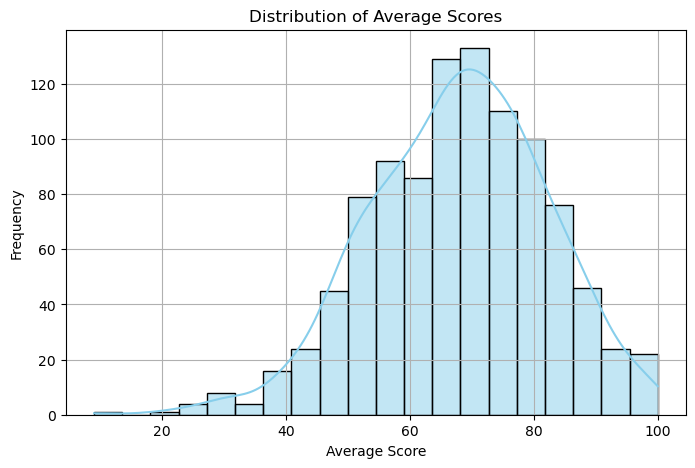

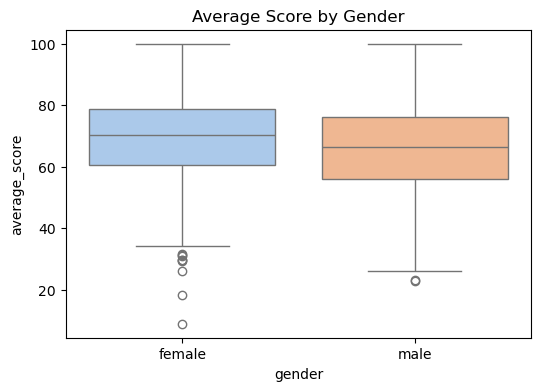

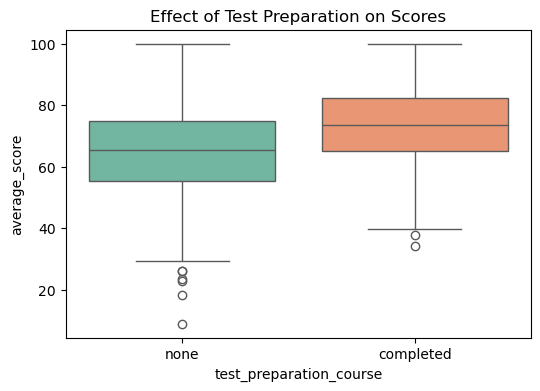

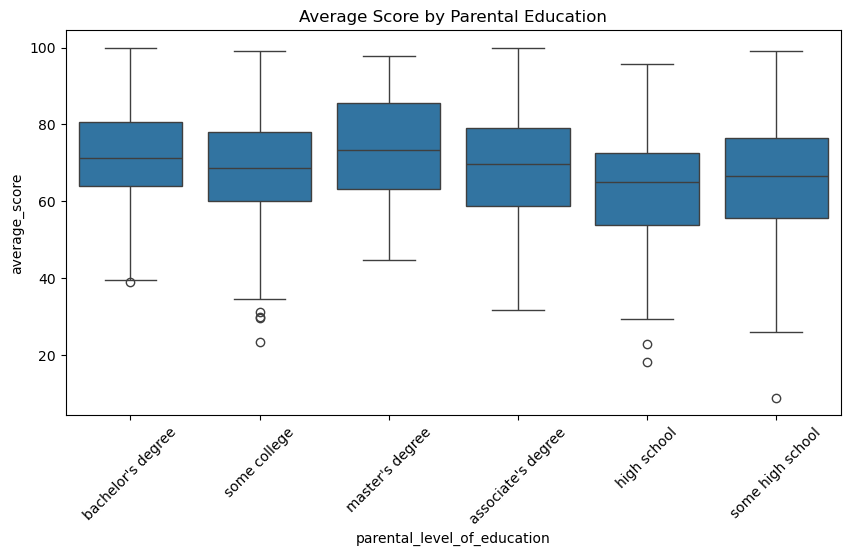

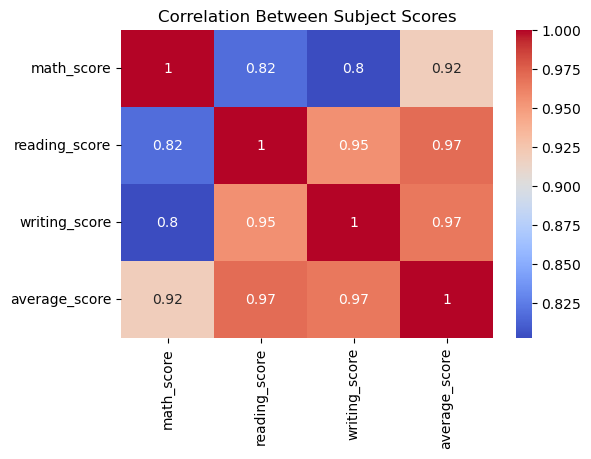

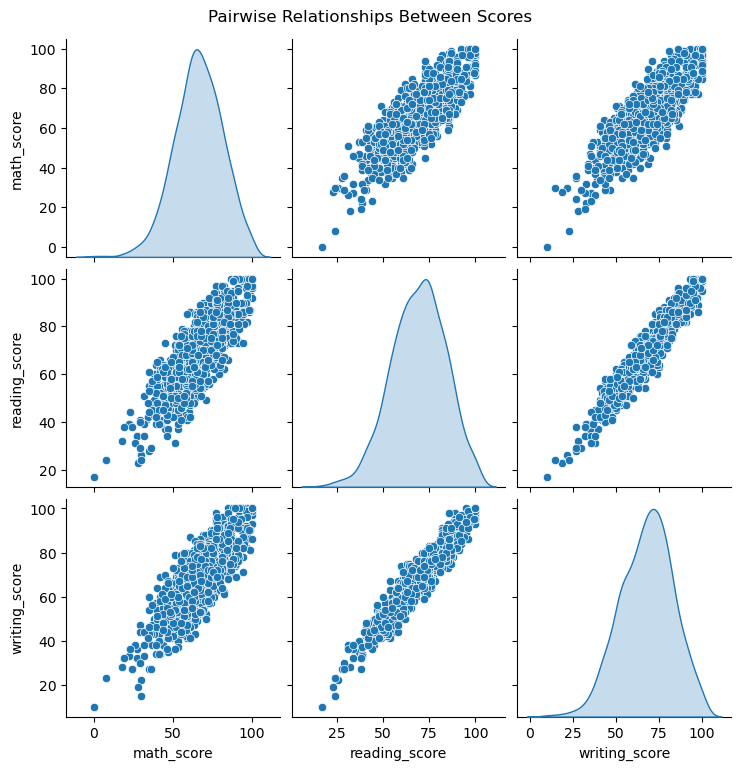


Key Insights:
- Students who completed a test preparation course tend to have higher average scores.
- Female students show higher reading and writing scores, while males slightly lead in math.
- Higher parental education levels are loosely associated with better performance.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv('student.csv')
df.head()

# Basic Info
df.info()
df.describe()
df.isnull().sum()

# Rename columns (optional for readability)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Add Total and Average Score Columns
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

# Overall Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Average Score by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='average_score', data=df, palette='pastel')
plt.title('Average Score by Gender')
plt.show()

# Average Score by Test Preparation
plt.figure(figsize=(6, 4))
sns.boxplot(x='test_preparation_course', y='average_score', data=df, palette='Set2')
plt.title('Effect of Test Preparation on Scores')
plt.show()

# Scores by Parental Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental_level_of_education', y='average_score', data=df)
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Subject Scores")
plt.show()

# Pairplot of Scores
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Scores", y=1.02)
plt.show()

# Insights (print key observations)
print("\nKey Insights:")
print("- Students who completed a test preparation course tend to have higher average scores.")
print("- Female students show higher reading and writing scores, while males slightly lead in math.")
print("- Higher parental education levels are loosely associated with better performance.")
